# Bayesian Optimization

In [2]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt
from skgarden import RandomForestQuantileRegressor
from dependence.plots import set_style_paper
from skopt import forest_minimize
from skopt.acquisition import gaussian_ei

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_style_paper()

In [6]:
class ModifiedRandomForestQuantileRegressor(RandomForestQuantileRegressor):
    def predict(self, X, return_std=False):
        """
        """
        X = np.asarray(X)
        alpha = 0.05
        n_sample = X.shape[0]
        n_estimators = self.n_estimators
        pred = np.zeros((n_estimators, n_sample))
        for i, tree in enumerate(self.estimators_):
            pred[i] = tree.predict(X, quantile=alpha*100)
            
        mean = pred.mean(axis=0)
        if return_std:
            std = pred.std(axis=0)
            return mean, std
        else:
            return mean

## On the dependence structure

In [7]:
from dependence.tests import func_sum
from dependence import ConservativeEstimate

dim = 2
theta_min, theta_max = -0.999, 0.999
margins = [ot.Normal()]*dim
coeficients = np.asarray(range(1, dim+1))
test_func = lambda x: func_sum(x, coeficients)

families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1
        
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

In [26]:
objective = lambda x: quant_estimate.stochastic_function(x, 1, return_input_sample=False)

In [48]:
from skopt import forest_minimize
n_random_start = 100
n_iter = 50
n_estimators = 100
min_samples_split = max(2, int(n_random_starts/10))

rfq = ModifiedRandomForestQuantileRegressor(n_estimators, min_samples_split=min_samples_split, n_jobs=7)
n_calls = n_random_start + n_iter
space = [(theta_min, theta_max)]
acq_func = 'EI'

opt_res = forest_minimize(objective, space, acq_func=acq_func, base_estimator=rfq,
                      n_calls=n_calls, n_random_starts=n_random_start, n_jobs=7, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0161
Function value obtained: -1.3736
Current minimum: -1.3736
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0146
Function value obtained: -0.2123
Current minimum: -1.3736
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0143
Function value obtained: -1.3633
Current minimum: -1.3736
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0142
Function value obtained: -3.1893
Current minimum: -3.1893
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0145
Function value obtained: 1.7858
Current minimum: -3.1893
Iteration No: 6 started. E

Current minimum: -7.1000
Iteration No: 55 started. Evaluating function at random point.
Iteration No: 55 ended. Evaluation done at random point.
Time taken: 0.0133
Function value obtained: 0.5943
Current minimum: -7.1000
Iteration No: 56 started. Evaluating function at random point.
Iteration No: 56 ended. Evaluation done at random point.
Time taken: 0.0134
Function value obtained: -2.3579
Current minimum: -7.1000
Iteration No: 57 started. Evaluating function at random point.
Iteration No: 57 ended. Evaluation done at random point.
Time taken: 0.0134
Function value obtained: -0.0641
Current minimum: -7.1000
Iteration No: 58 started. Evaluating function at random point.
Iteration No: 58 ended. Evaluation done at random point.
Time taken: 0.0135
Function value obtained: 0.4880
Current minimum: -7.1000
Iteration No: 59 started. Evaluating function at random point.
Iteration No: 59 ended. Evaluation done at random point.
Time taken: 0.0134
Function value obtained: 0.8104
Current minimum: -

Iteration No: 101 ended. Search finished for the next optimal point.
Time taken: 0.3308
Function value obtained: 3.5261
Current minimum: -7.1000
Iteration No: 102 started. Searching for the next optimal point.
Iteration No: 102 ended. Search finished for the next optimal point.
Time taken: 0.3327
Function value obtained: -1.1549
Current minimum: -7.1000
Iteration No: 103 started. Searching for the next optimal point.
Iteration No: 103 ended. Search finished for the next optimal point.
Time taken: 0.4397
Function value obtained: -1.1842
Current minimum: -7.1000
Iteration No: 104 started. Searching for the next optimal point.
Iteration No: 104 ended. Search finished for the next optimal point.
Time taken: 0.3320
Function value obtained: 3.5366
Current minimum: -7.1000
Iteration No: 105 started. Searching for the next optimal point.
Iteration No: 105 ended. Search finished for the next optimal point.
Time taken: 0.3299
Function value obtained: -0.9335
Current minimum: -7.1000
Iteration No

Iteration No: 140 ended. Search finished for the next optimal point.
Time taken: 0.4087
Function value obtained: 0.2220
Current minimum: -7.1000
Iteration No: 141 started. Searching for the next optimal point.
Iteration No: 141 ended. Search finished for the next optimal point.
Time taken: 0.4360
Function value obtained: -0.9846
Current minimum: -7.1000
Iteration No: 142 started. Searching for the next optimal point.
Iteration No: 142 ended. Search finished for the next optimal point.
Time taken: 0.3356
Function value obtained: 2.0614
Current minimum: -7.1000
Iteration No: 143 started. Searching for the next optimal point.
Iteration No: 143 ended. Search finished for the next optimal point.
Time taken: 0.3346
Function value obtained: 0.3643
Current minimum: -7.1000
Iteration No: 144 started. Searching for the next optimal point.
Iteration No: 144 ended. Search finished for the next optimal point.
Time taken: 0.3344
Function value obtained: 3.1220
Current minimum: -7.1000
Iteration No: 

In [54]:
model = opt_res.models[-1]
x = np.asarray(opt_res.x_iters)
q = model.predict(x)
x_random_start = x[:n_random_start]
x_iter = x[n_random_start:]
y_random_start = q[:n_random_start]
y_iter = q[n_random_start:]
id_min = q.argmin()
x_min = x[id_min]
q_min = q[id_min]
acq = gaussian_ei(x, model, y_opt=np.min(q))

[autoreload of numpy failed: Traceback (most recent call last):
  File "/home/D58174/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/D58174/anaconda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/D58174/anaconda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/D58174/anaconda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/D58174/anaconda/lib/python3.6/site-packages/numpy/__init__.py", line 152, in <module>
    test = testing.nosetester._numpy_tester().test
NameError: name 'testing' is not defin

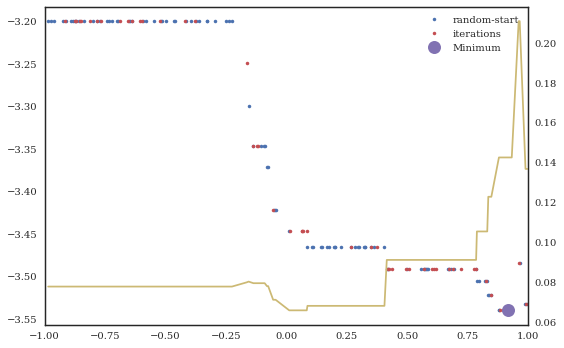

In [57]:
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = ax.twinx()
id_sort = np.argsort(x, 0).ravel()
ax2.plot(x[id_sort], acq[id_sort], "y", label="EI(x)")
ax.plot(x_random_start, y_random_start, 'b.', label='random-start')
ax.plot(x_iter, y_iter, 'r.', label='iterations')
ax.plot(x_min, q_min, 'mo', markersize=13, label='Minimum')
ax.legend(loc=0)
ax.set_xlim(theta_min, theta_max)
fig.tight_layout()
#fig.savefig('bayesian-optim-test.pdf')